# lib

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# dataset

In [3]:
df = pd.read_csv('football.csv')
df[25:35]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
25,Per Mertesacker,Arsenal,32,CB,3,6.0,702,5.0,1.00%,1,2.0,Germany,0,5,1,1,0
26,Sead Kolasinac,Arsenal,24,LB,3,15.0,618,6.0,6.90%,0,2.0,Bosnia,1,2,1,1,0
27,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183,10.5,26.50%,0,2.0,France,1,3,1,1,0
28,Joshua King,Bournemouth,25,SS,1,8.0,997,7.5,10.40%,178,2.0,Norway,0,3,2,0,0
29,Jermain Defoe,Bournemouth,34,CF,1,5.0,3213,8.0,15.00%,166,1.0,England,0,6,2,0,0
30,Charlie Daniels,Bournemouth,30,LB,3,3.0,185,5.0,19.80%,134,1.0,England,0,4,2,0,0
31,Artur Boruc,Bournemouth,37,GK,4,1.0,436,4.5,6.90%,120,2.0,Poland,0,6,2,0,0
32,Steve Cook,Bournemouth,26,CB,3,5.0,184,5.0,2.00%,112,1.0,England,0,3,2,0,0
33,Junior Stanislas,Bournemouth,27,LW,1,4.5,315,6.0,0.60%,107,1.0,England,0,3,2,0,0
34,Adam Smith,Bournemouth,26,RB,3,5.0,200,5.0,0.90%,104,1.0,England,0,3,2,0,0


In [4]:
df.shape

(461, 17)

In [5]:
df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [6]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [29]:
df['market_value'].max()

75.0

In [8]:
df['club'].unique()   # names of diff clubs

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [9]:
print("clubs             players in each club\n")     # players in each club
df['club'].value_counts() 
#df.columns = ['club', 'value_counts']

clubs             players in each club



Huddersfield         28
Arsenal              28
Everton              28
Liverpool            27
Manchester+United    25
Swansea              25
Watford              24
Bournemouth          24
Leicester+City       24
Southampton          23
West+Ham             22
Stoke+City           22
Brighton+and+Hove    22
Crystal+Palace       21
Newcastle+United     21
Tottenham            20
Manchester+City      20
Chelsea              20
West+Brom            19
Burnley              18
Name: club, dtype: int64

In [10]:
df['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

In [11]:
df['position'].value_counts()          # total players in each kinf of position category

CB    85
CM    63
CF    61
GK    42
LW    36
DM    36
LB    35
RB    34
RW    32
AM    17
LM     8
SS     7
RM     5
Name: position, dtype: int64

In [30]:
dup=df.duplicated()
print(dup.sum())

0


## replacing nan values with logic

In [12]:
df.isnull().values.any()

True

In [13]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

### do we need region for prediction????

In [14]:
df['region'] == 0 

0      False
1      False
2      False
3      False
4      False
       ...  
456    False
457    False
458    False
459    False
460    False
Name: region, Length: 461, dtype: bool

In [15]:
print(df[df['region'].isnull()])

             name          club  age  ... club_id  big_club  new_signing
188  Steve Mounie  Huddersfield   22  ...       8         0            0

[1 rows x 17 columns]


In [16]:
display(df.iloc[188])

name            Steve Mounie
club            Huddersfield
age                       22
position                  CF
position_cat               1
market_value             5.5
page_views                56
fpl_value                  6
fpl_sel                0.60%
fpl_points                 0
region                   NaN
nationality            Benin
new_foreign                0
age_cat                    2
club_id                    8
big_club                   0
new_signing                0
Name: 188, dtype: object

### so lets replace nan value with 4 bcoz it falls under category 4- other countries

In [17]:

df['region'] = df['region'].replace(np.nan, 4)

In [18]:
display(df.iloc[188])

name            Steve Mounie
club            Huddersfield
age                       22
position                  CF
position_cat               1
market_value             5.5
page_views                56
fpl_value                  6
fpl_sel                0.60%
fpl_points                 0
region                     4
nationality            Benin
new_foreign                0
age_cat                    2
club_id                    8
big_club                   0
new_signing                0
Name: 188, dtype: object

In [19]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

# Exploratory data analysis

In [20]:
df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

## age distribution

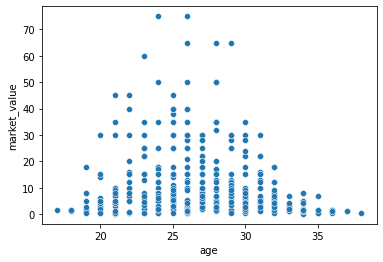

In [31]:
sns.scatterplot(data=df,x='age',y='market_value')         #age/market_value

In [102]:
average_age = []
for clb in club:
    average_age.append(np.mean(df['age'].loc[df['club']==club]))

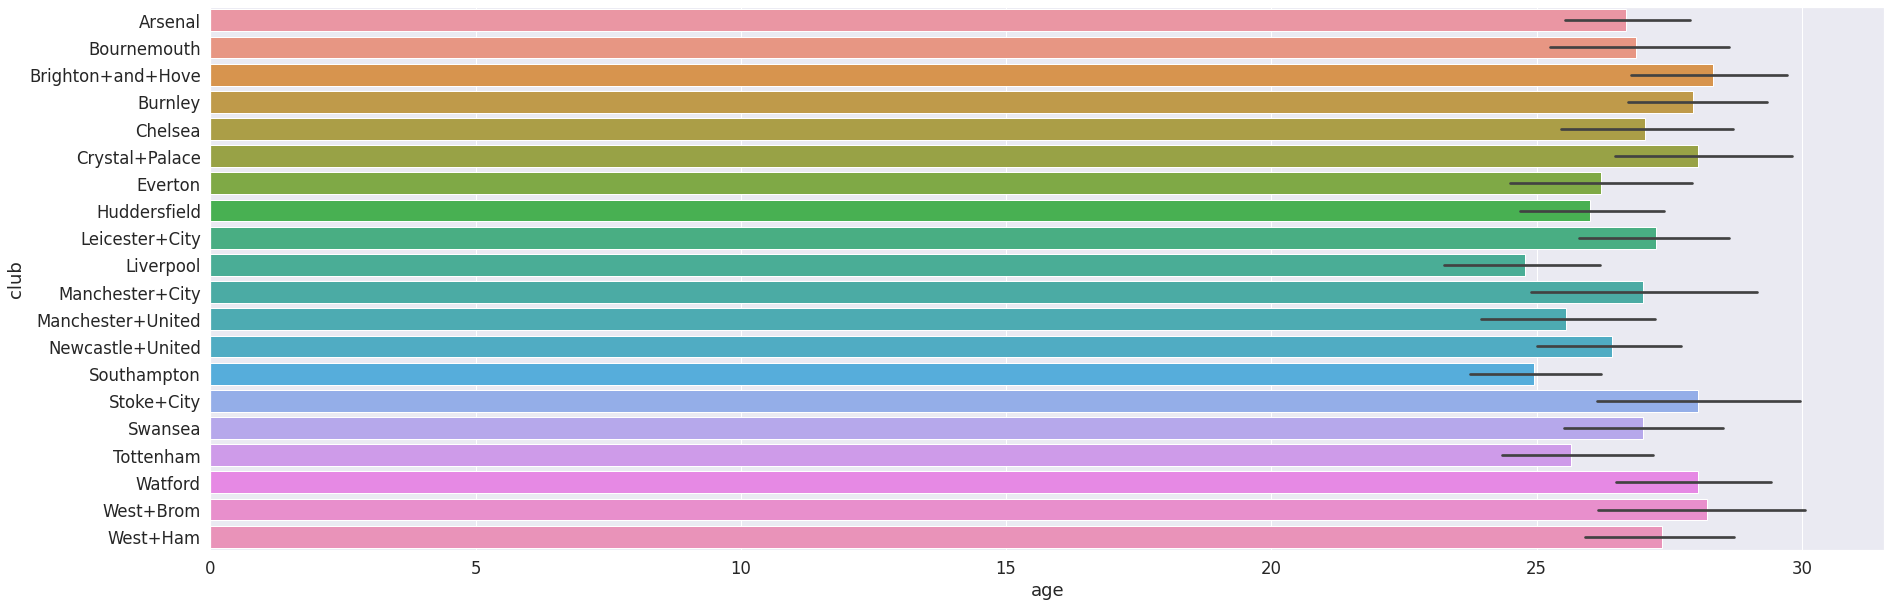

In [106]:
sns.barplot(data=df,x='age',y='club')   

## position category distribution

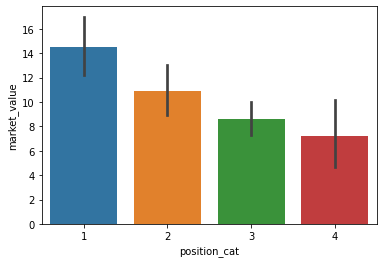

In [32]:
sns.barplot(data=df,x='position_cat',y='market_value')   #position_cat/market_value    

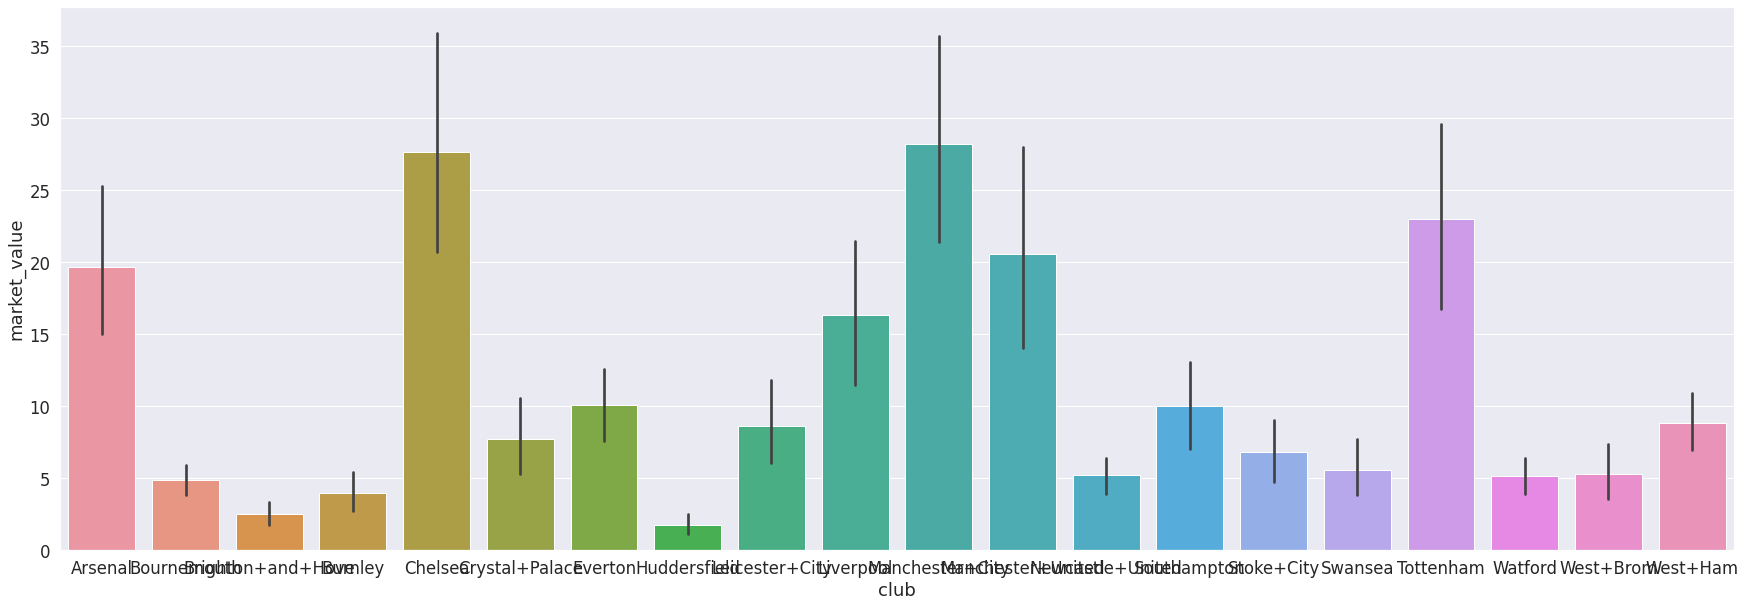

In [99]:
sns.barplot(data=df,x='club',y='market_value') 

## page view distribution

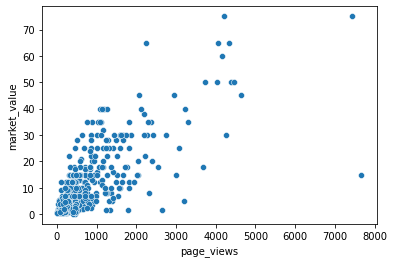

In [33]:
sns.scatterplot(data=df,x='page_views',y='market_value')  #page_views/market_value

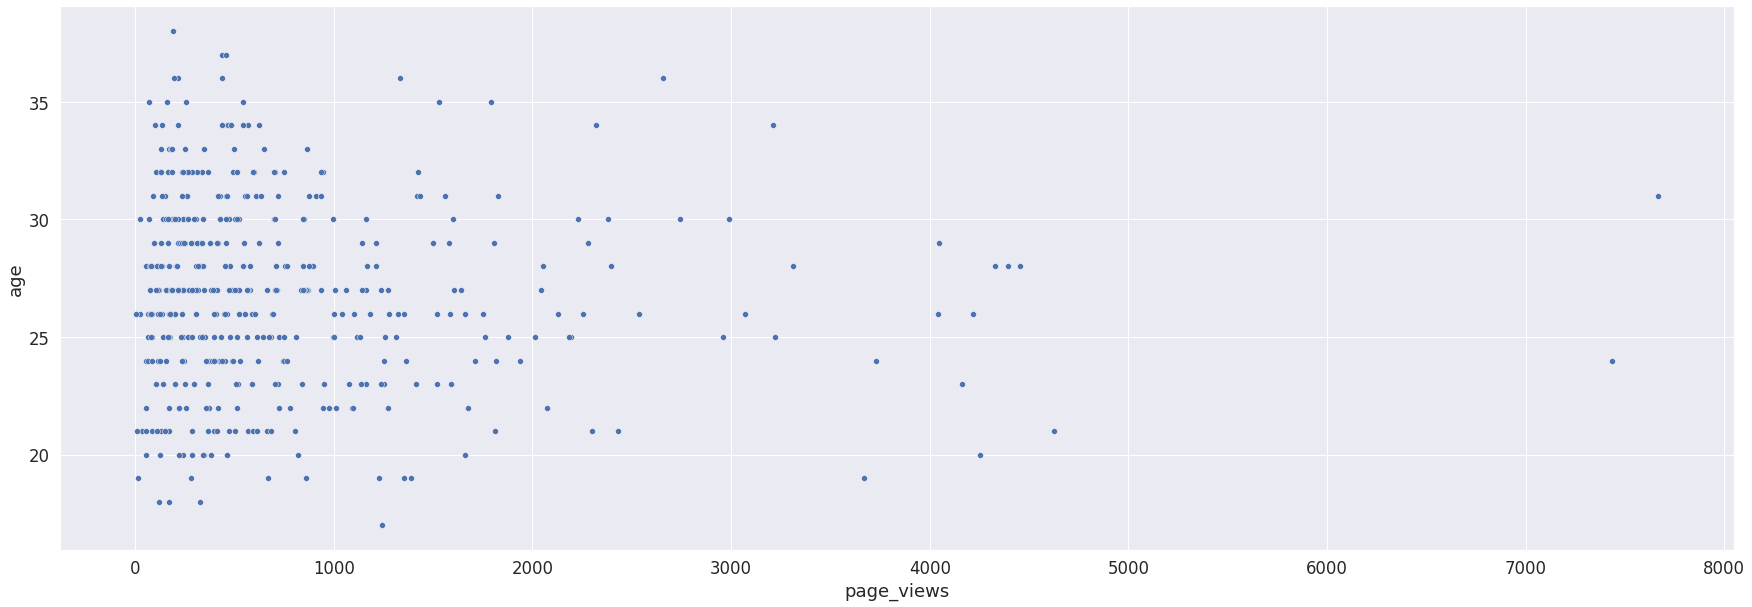

In [85]:
sns.scatterplot(data=df,x='page_views',y='age')  #page_views/age

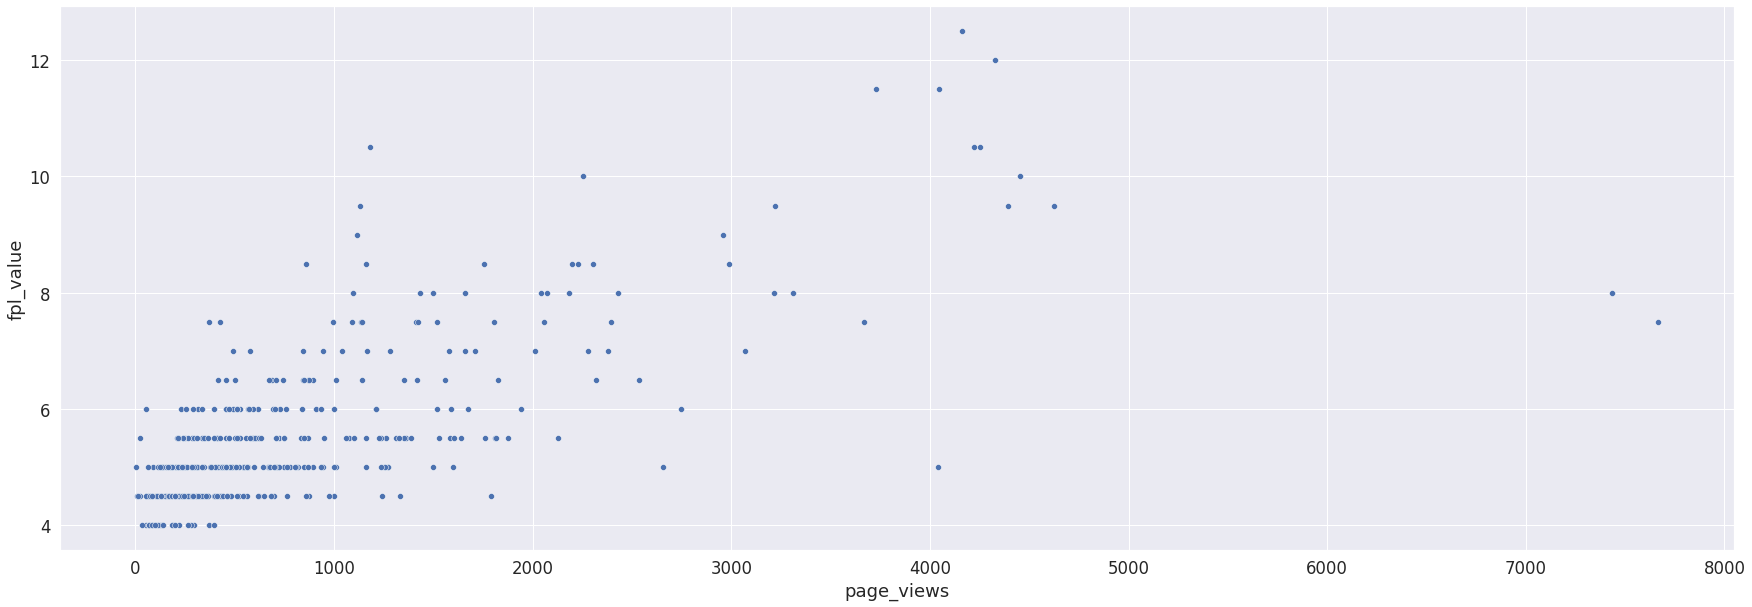

In [94]:
sns.scatterplot(data=df,x='page_views',y='fpl_value')  #page_views/fpl values

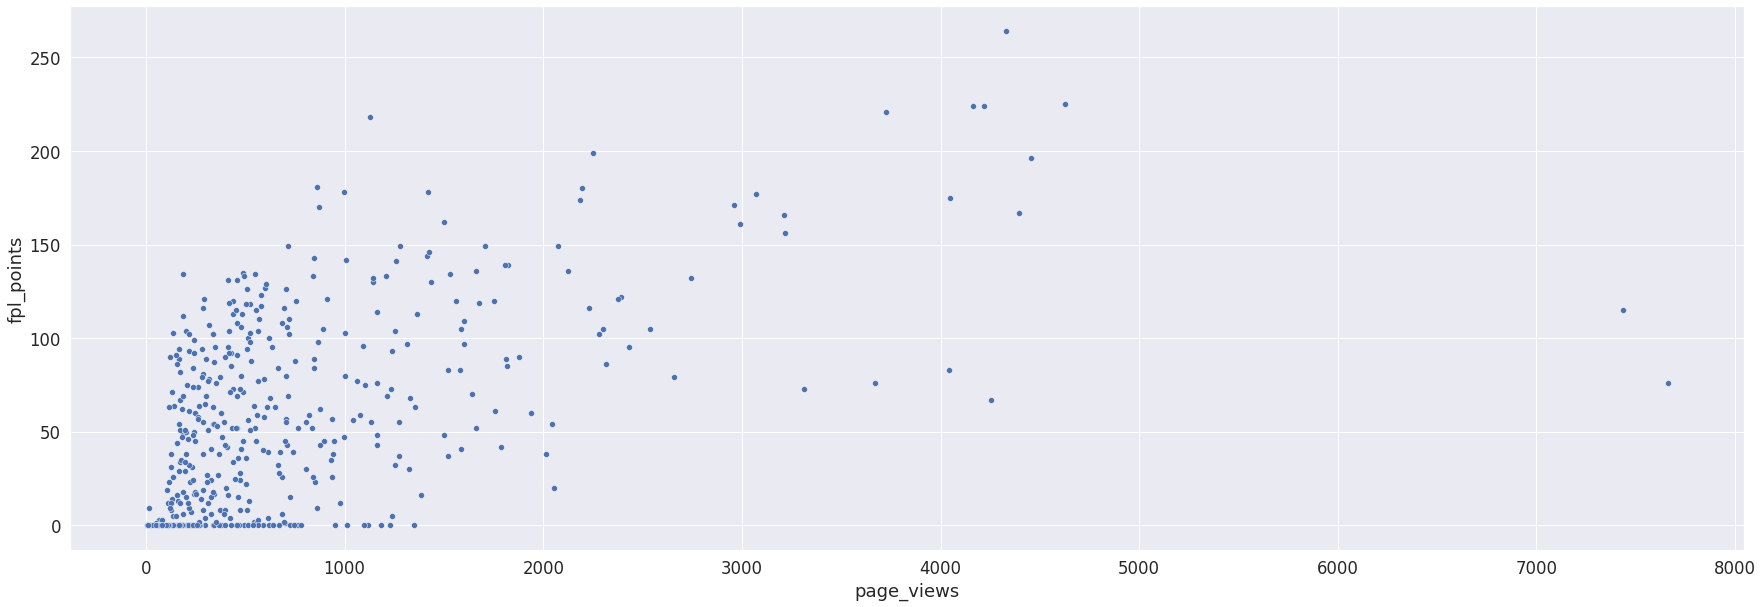

In [88]:
sns.scatterplot(data=df,x='page_views',y='fpl_points')  #page_views/fpl points

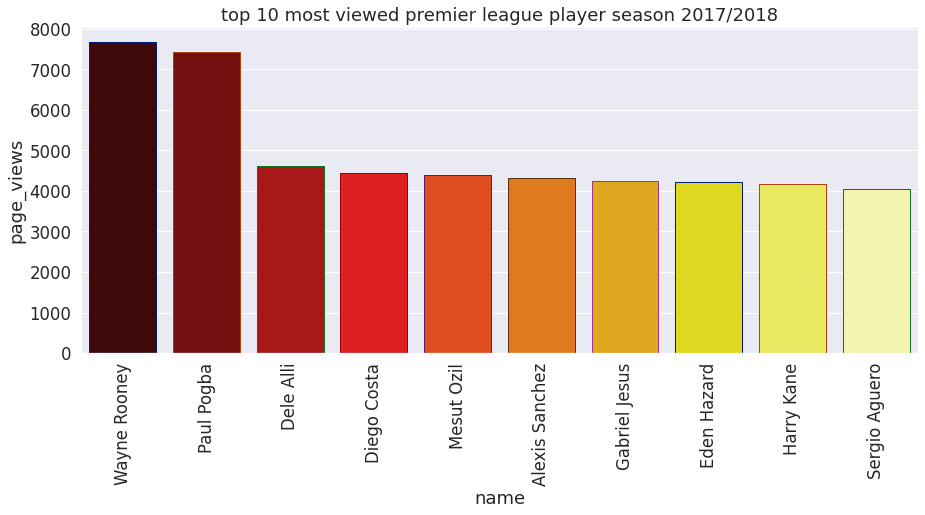

In [126]:
#most view player
dfview = df.nlargest(10, 'page_views').sort_values('page_views',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="page_views",  data=dfview ,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 most viewed premier league player season 2017/2018')
plt.show()

In [34]:
df.corr(method='pearson')

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,0.187785,0.080379,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,-0.084682,-0.067439,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.615155,0.099114,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.542464,0.027441,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.618837,0.083883,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,1.000000,-0.011569,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.080379,-0.067439,0.099114,0.027441,0.083883,-0.011569,1.000000,0.049800,0.085190,0.066483,0.035883,0.174007
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,-0.204837,0.049800,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,0.176572,0.085190,-0.113998,1.000000,-0.004668,-0.113835,-0.076102
club_id,-0.002868,-0.016599,-0.046068,-0.092409,-0.060884,0.041094,0.066483,-0.002786,-0.004668,1.000000,-0.155667,0.134085


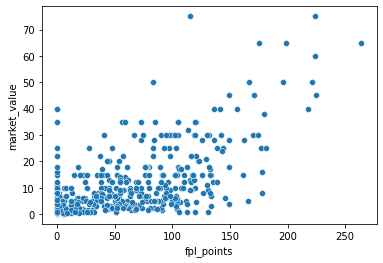

In [35]:
sns.scatterplot(data=df,x='fpl_points',y='market_value')  #page_views/market_value

In [113]:
country, counts = np.unique(df['nationality'], return_counts=True)

In [118]:
!pip install chart_studio

     |████████████████████████████████| 71kB 1.9MB/s 


In [119]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [121]:
from plotly.offline import iplot
keys= country
values=counts

iplot({
    "data": [go.Bar(x=keys, y=values)],
    "layout": go.Layout(title="Nationality of Players")
})

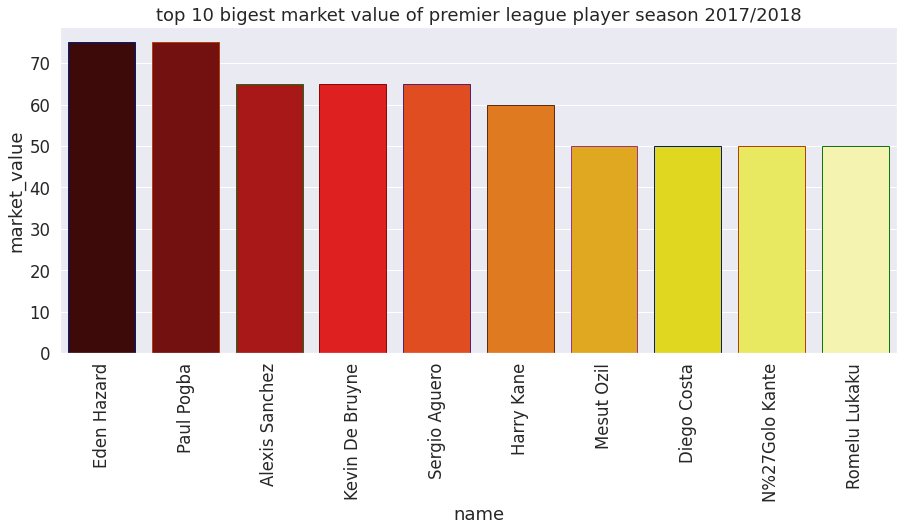

In [124]:
#most market value
dfmarketv = df.nlargest(10, 'market_value').sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="market_value",  data=dfmarketv ,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 bigest market value of premier league player season 2017/2018')
plt.show()

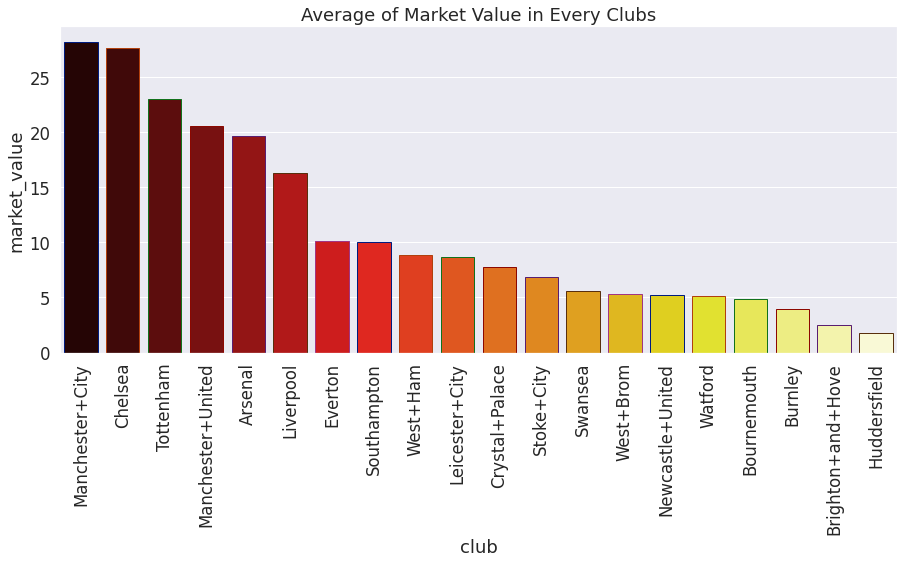

In [125]:
#club with their market value average
df_meanmv=pd.DataFrame(df.groupby(['club'])['market_value'].mean()).reset_index().sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="market_value",data=df_meanmv,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of Market Value in Every Clubs')
plt.show()

## position distribution

In [41]:
df1=df.iloc[:,[1,4,5]]

df1

,club,position_cat,market_value
0,Arsenal,1,65.0
1,Arsenal,1,50.0
2,Arsenal,4,7.0
3,Arsenal,1,20.0
4,Arsenal,3,22.0
...,...,...,...
456,West+Ham,2,5.0
457,West+Ham,3,7.0
458,West+Ham,3,4.5
459,West+Ham,1,1.0


In [42]:
df1 = df1.groupby(['club','position_cat'])
df2 = df1.mean()
df2 = df2.reset_index()

In [43]:
df2

,club,position_cat,market_value
0,Arsenal,1,29.6250
1,Arsenal,2,21.0000
2,Arsenal,3,15.1000
3,Arsenal,4,5.0000
4,Bournemouth,1,6.3500
...,...,...,...
75,West+Brom,4,2.7500
76,West+Ham,1,11.5000
77,West+Ham,2,8.2500
78,West+Ham,3,7.3125


In [45]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [47]:
sns.set(font_scale=1.5)

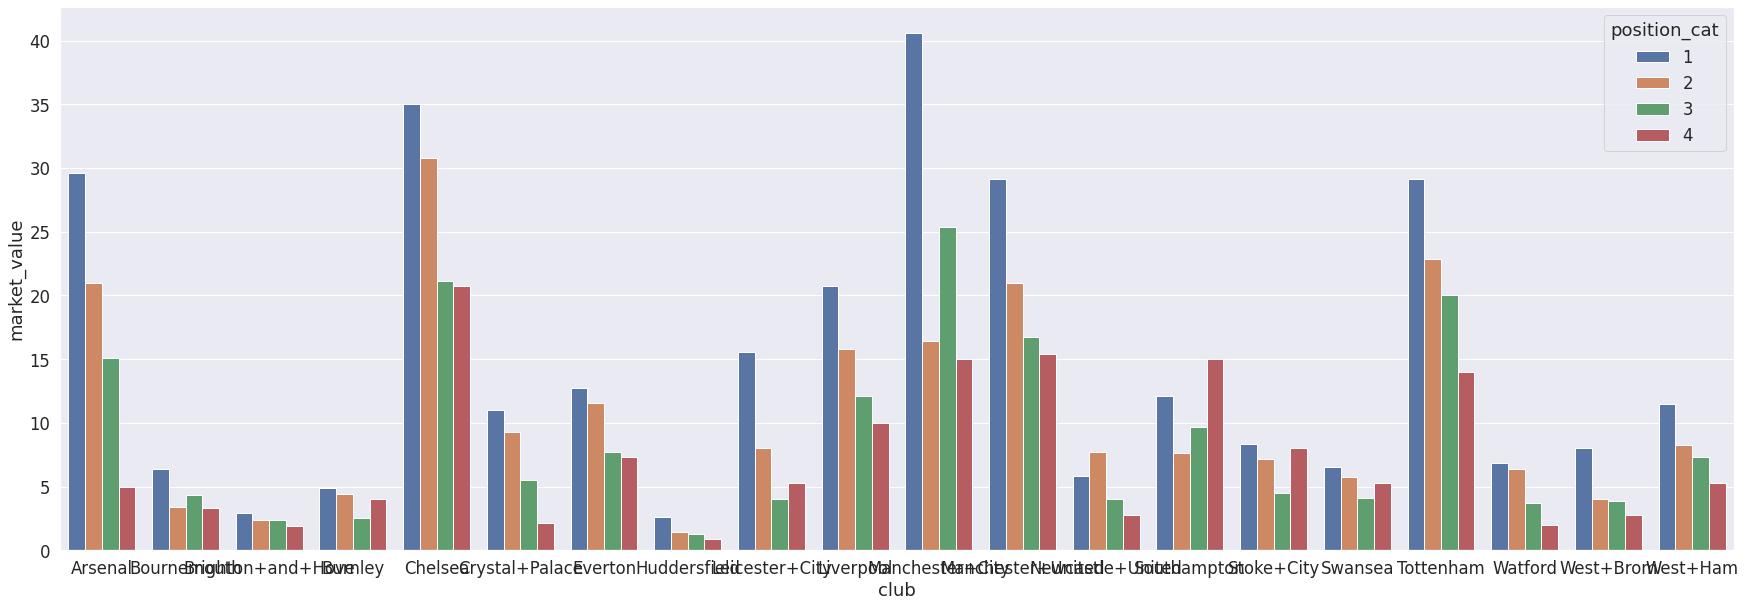

In [48]:
sns.barplot(data=df2,x='club',y='market_value',hue='position_cat')   #position_cat/market_value/club  

In [51]:
df_task1=df.iloc[:,[1,6]]
df_task1

,club,page_views
0,Arsenal,4329
1,Arsenal,4395
2,Arsenal,1529
3,Arsenal,2393
4,Arsenal,912
...,...,...
456,West+Ham,288
457,West+Ham,199
458,West+Ham,198
459,West+Ham,412


In [52]:
grouped_df=df_task1.groupby('club')
grouped_mean=grouped_df.mean()
grouped_mean=grouped_mean.reset_index()

In [53]:
grouped_mean

,club,page_views
0,Arsenal,1402.785714
1,Bournemouth,508.458333
2,Brighton+and+Hove,198.272727
3,Burnley,287.833333
4,Chelsea,1773.800000
5,Crystal+Palace,455.428571
6,Everton,908.785714
7,Huddersfield,139.785714
8,Leicester+City,712.750000
9,Liverpool,1195.296296


In [54]:
grouped_mean.sort_values('page_views',axis=0,na_position='last',inplace=True,ascending=False)

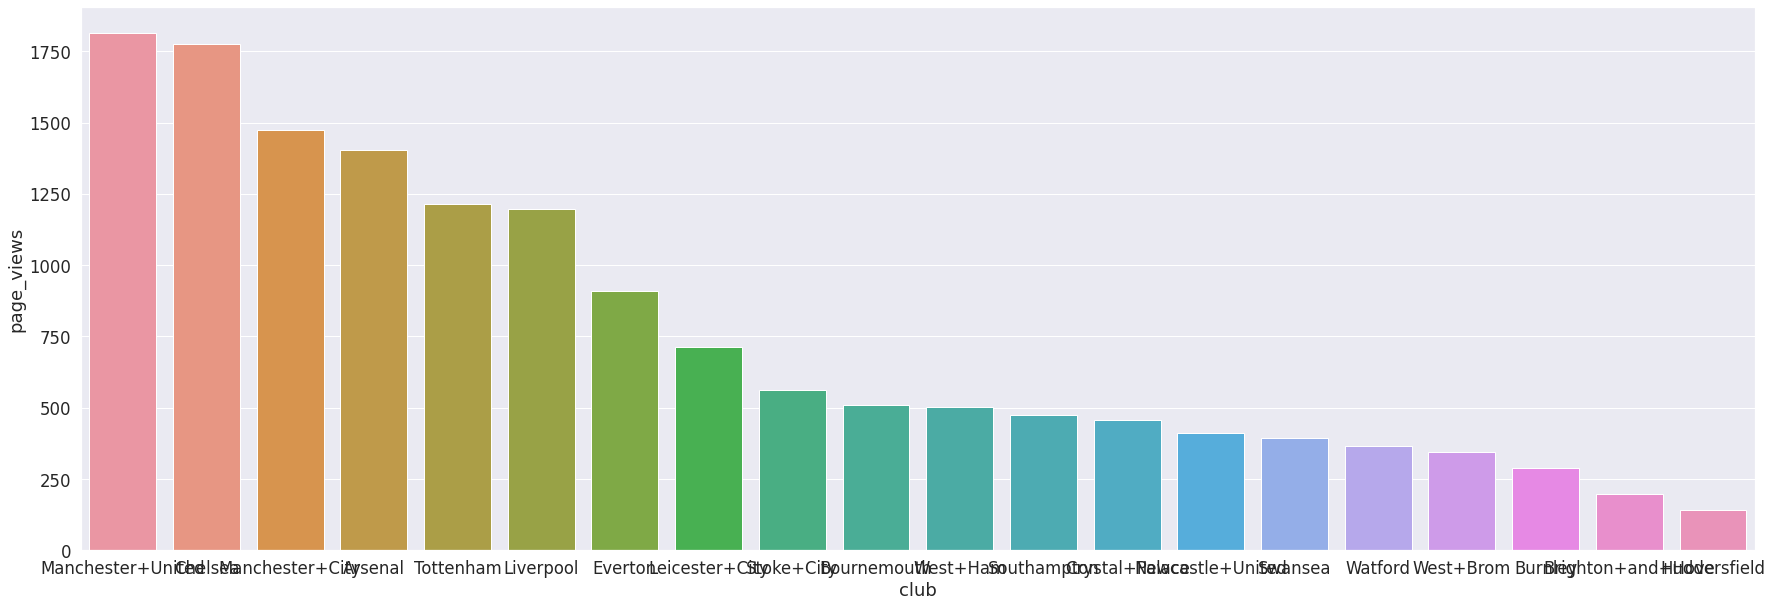

In [55]:
sns.barplot(data=grouped_mean,x='club',y='page_views')

In [56]:
df_task2=df.loc[:,['club','market_value']]

In [57]:
df_task2

,club,market_value
0,Arsenal,65.0
1,Arsenal,50.0
2,Arsenal,7.0
3,Arsenal,20.0
4,Arsenal,22.0
...,...,...
456,West+Ham,5.0
457,West+Ham,7.0
458,West+Ham,4.5
459,West+Ham,1.0


In [58]:

df_grouped2=df_task2.groupby('club')
df_mean=df_grouped2.mean()
df_mean=df_mean.reset_index()

In [59]:

df_mean

,club,market_value
0,Arsenal,19.642857
1,Bournemouth,4.895833
2,Brighton+and+Hove,2.522727
3,Burnley,3.958333
4,Chelsea,27.677500
5,Crystal+Palace,7.726190
6,Everton,10.098214
7,Huddersfield,1.791071
8,Leicester+City,8.645833
9,Liverpool,16.314815


In [60]:
df_mean.sort_values('market_value',axis=0,ascending=False,inplace=True,na_position='last')

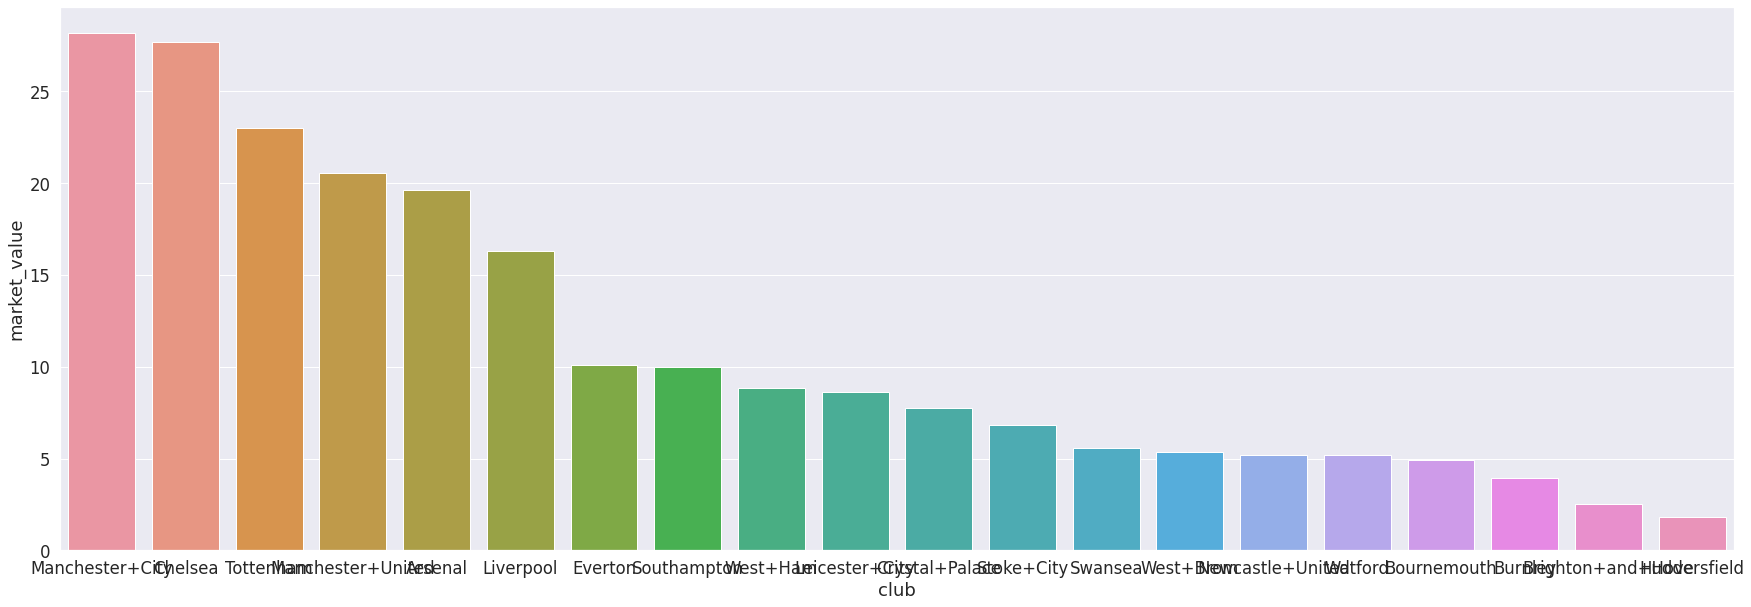

In [61]:
sns.barplot(data=df_mean,x='club',y='market_value')

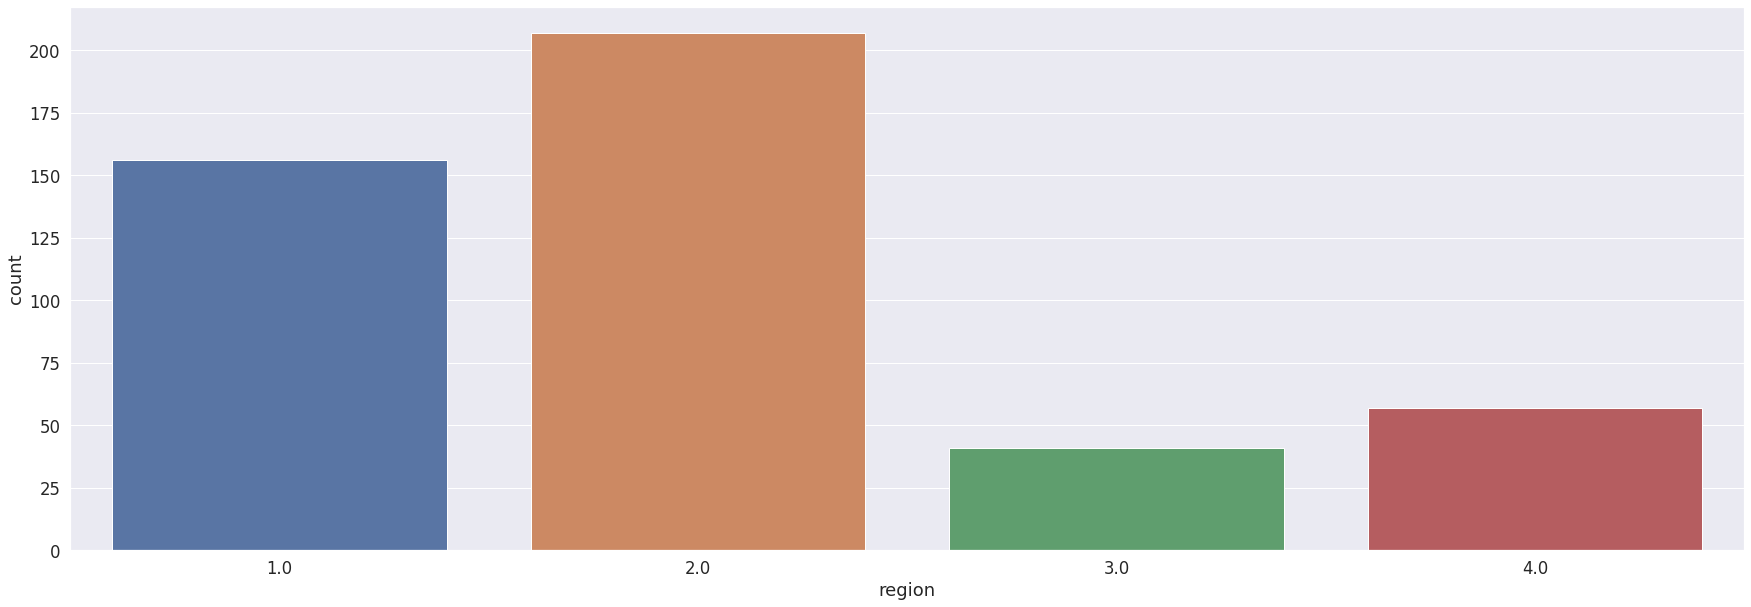

In [62]:
sns.countplot(data=df,x='region')

In [63]:
df_task4=df.loc[:,['region','market_value']]

In [64]:
df_task4

,region,market_value
0,3.0,65.0
1,2.0,50.0
2,2.0,7.0
3,1.0,20.0
4,2.0,22.0
...,...,...
456,2.0,5.0
457,4.0,7.0
458,1.0,4.5
459,1.0,1.0


In [65]:
grouped_4=df_task4.groupby('region')
mean_4=grouped_4.mean()
mean_4=mean_4.reset_index()

In [66]:
mean_4

,region,market_value
0,1.0,8.482372
1,2.0,12.208454
2,3.0,14.704878
3,4.0,10.934211


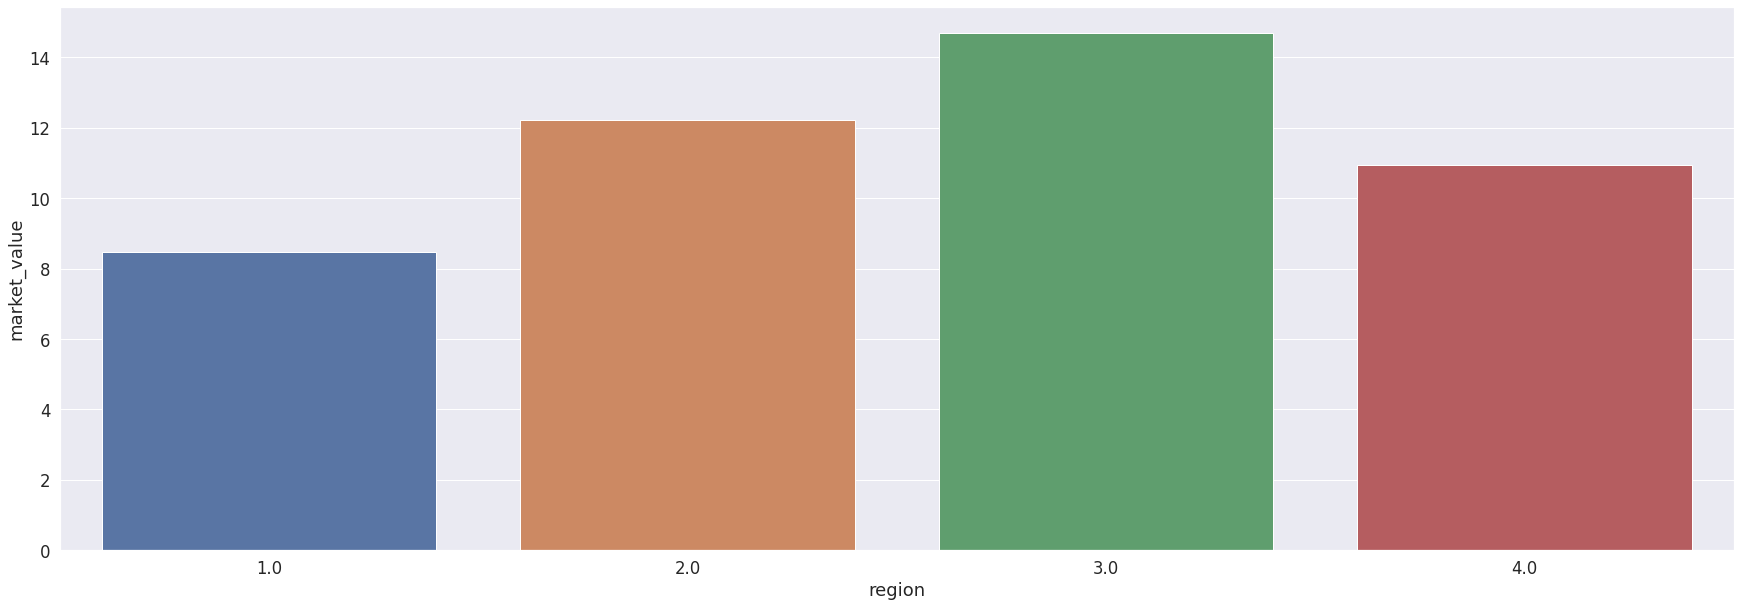

In [67]:
sns.barplot(data=mean_4,x='region',y='market_value')

In [68]:
# Changing the fpl_sel column from string object to float values
lstdf1=[]
lst_df=list(df['fpl_sel'])
for val in lst_df:
    x=val.split('%')
    lstdf1.append(x)

In [69]:
lstdf1

[['17.10', ''],
 ['5.60', ''],
 ['5.90', ''],
 ['1.50', ''],
 ['0.70', ''],
 ['13.70', ''],
 ['2.50', ''],
 ['4.70', ''],
 ['4.00', ''],
 ['1.00', ''],
 ['2.00', ''],
 ['1.80', ''],
 ['0.00', ''],
 ['5.10', ''],
 ['1.70', ''],
 ['0.10', ''],
 ['0.50', ''],
 ['0.10', ''],
 ['0.50', ''],
 ['1.70', ''],
 ['0.80', ''],
 ['0.10', ''],
 ['4.20', ''],
 ['0.20', ''],
 ['0.40', ''],
 ['1.00', ''],
 ['6.90', ''],
 ['26.50', ''],
 ['10.40', ''],
 ['15.00', ''],
 ['19.80', ''],
 ['6.90', ''],
 ['2.00', ''],
 ['0.60', ''],
 ['0.90', ''],
 ['1.60', ''],
 ['4.00', ''],
 ['0.70', ''],
 ['0.90', ''],
 ['0.10', ''],
 ['0.20', ''],
 ['11.50', ''],
 ['0.10', ''],
 ['1.10', ''],
 ['0.40', ''],
 ['0.80', ''],
 ['0.10', ''],
 ['1.50', ''],
 ['0.10', ''],
 ['0.40', ''],
 ['3.30', ''],
 ['9.30', ''],
 ['2.10', ''],
 ['1.50', ''],
 ['4.10', ''],
 ['0.60', ''],
 ['8.00', ''],
 ['0.40', ''],
 ['0.20', ''],
 ['3.20', ''],
 ['0.80', ''],
 ['0.20', ''],
 ['4.80', ''],
 ['0.90', ''],
 ['0.30', ''],
 ['0.60', ''],
 ['

In [70]:
lst_final=[]
for value in lstdf1:
    lst_final.append(float(value[0]))

In [71]:

lst_final

[17.1,
 5.6,
 5.9,
 1.5,
 0.7,
 13.7,
 2.5,
 4.7,
 4.0,
 1.0,
 2.0,
 1.8,
 0.0,
 5.1,
 1.7,
 0.1,
 0.5,
 0.1,
 0.5,
 1.7,
 0.8,
 0.1,
 4.2,
 0.2,
 0.4,
 1.0,
 6.9,
 26.5,
 10.4,
 15.0,
 19.8,
 6.9,
 2.0,
 0.6,
 0.9,
 1.6,
 4.0,
 0.7,
 0.9,
 0.1,
 0.2,
 11.5,
 0.1,
 1.1,
 0.4,
 0.8,
 0.1,
 1.5,
 0.1,
 0.4,
 3.3,
 9.3,
 2.1,
 1.5,
 4.1,
 0.6,
 8.0,
 0.4,
 0.2,
 3.2,
 0.8,
 0.2,
 4.8,
 0.9,
 0.3,
 0.6,
 0.2,
 0.1,
 0.2,
 0.1,
 0.3,
 1.3,
 0.4,
 0.2,
 13.5,
 2.9,
 1.7,
 13.7,
 2.5,
 1.2,
 1.2,
 0.2,
 0.1,
 0.2,
 0.0,
 0.5,
 0.1,
 0.4,
 0.1,
 0.1,
 1.7,
 0.4,
 2.3,
 3.0,
 12.0,
 12.4,
 12.3,
 7.8,
 18.5,
 20.3,
 7.5,
 9.0,
 0.2,
 5.0,
 13.8,
 0.2,
 1.6,
 0.8,
 0.1,
 0.1,
 6.4,
 1.6,
 20.9,
 10.5,
 2.7,
 4.2,
 10.9,
 2.1,
 1.2,
 1.4,
 0.6,
 2.0,
 1.1,
 0.6,
 0.3,
 0.3,
 0.2,
 0.1,
 0.0,
 0.1,
 0.0,
 16.4,
 2.0,
 0.7,
 10.0,
 0.4,
 4.7,
 3.2,
 13.1,
 6.3,
 14.6,
 0.4,
 1.3,
 20.9,
 0.1,
 0.3,
 1.7,
 1.0,
 2.9,
 0.2,
 0.9,
 0.4,
 0.1,
 0.2,
 0.3,
 0.3,
 1.7,
 0.2,
 0.2,
 3.6,
 2.1,
 2.4,
 0.5,

In [72]:
df_changed=df.drop('fpl_sel',axis=1)

In [73]:
df_changed

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,16,1.0,England,0,1,20,0,1


In [74]:
df_changed['fpl_sel']=lst_final

In [75]:
df_changed

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_sel
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,264,3.0,Chile,0,4,1,1,0,17.1
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,167,2.0,Germany,0,4,1,1,0,5.6
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,134,2.0,Czech Republic,0,6,1,1,0,5.9
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,122,1.0,England,0,4,1,1,0,1.5
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,121,2.0,France,0,4,1,1,0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,38,2.0,Switzerland,0,1,20,0,1,0.4
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,34,4.0,Congo DR,0,2,20,0,1,0.2
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,29,1.0,England,0,2,20,0,0,0.3
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,16,1.0,England,0,1,20,0,1,5.9


In [76]:
df_changed.corr(method='pearson')

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,fpl_sel
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,0.187785,0.080379,-0.125400,0.972199,-0.002868,-0.123566,-0.079190,-0.003018
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,-0.084682,-0.067439,0.001415,0.196853,-0.016599,0.017915,-0.105127,0.017437
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.615155,0.099114,0.098056,-0.117682,-0.046068,0.593483,0.131321,0.548703
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.542464,0.027441,-0.049725,-0.041672,-0.092409,0.502982,0.127249,0.524926
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.618837,0.083883,0.108650,-0.082056,-0.060884,0.423556,0.098314,0.504888
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,1.000000,-0.011569,-0.204837,0.176572,0.041094,0.280061,0.085720,0.517008
region,0.080379,-0.067439,0.099114,0.027441,0.083883,-0.011569,1.000000,0.049800,0.085190,0.066483,0.035883,0.174007,-0.055093
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,-0.204837,0.049800,1.000000,-0.113998,-0.002786,0.080949,-0.078193,0.079416
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,0.176572,0.085190,-0.113998,1.000000,-0.004668,-0.113835,-0.076102,-0.010506
club_id,-0.002868,-0.016599,-0.046068,-0.092409,-0.060884,0.041094,0.066483,-0.002786,-0.004668,1.000000,-0.155667,0.134085,-0.033063


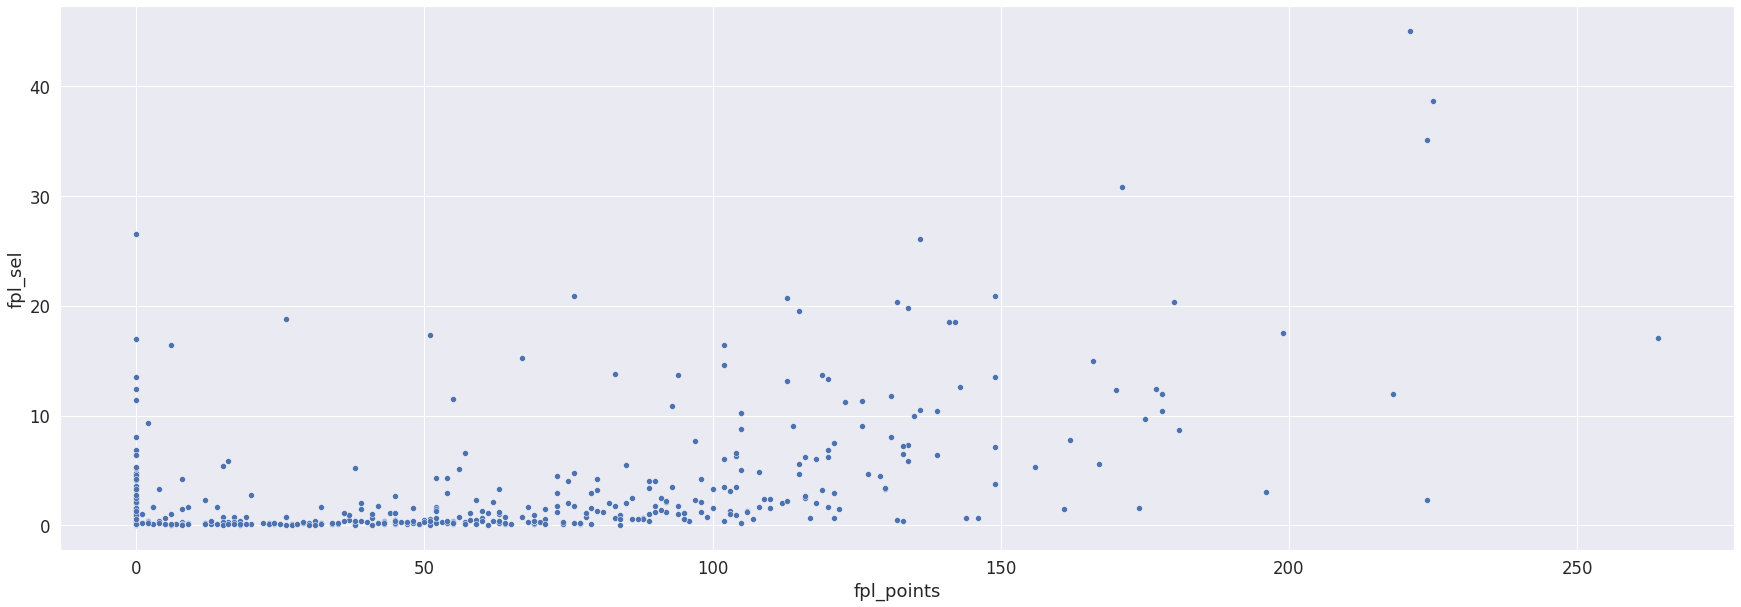

In [77]:
sns.scatterplot(data=df_changed,x='fpl_points',y='fpl_sel')

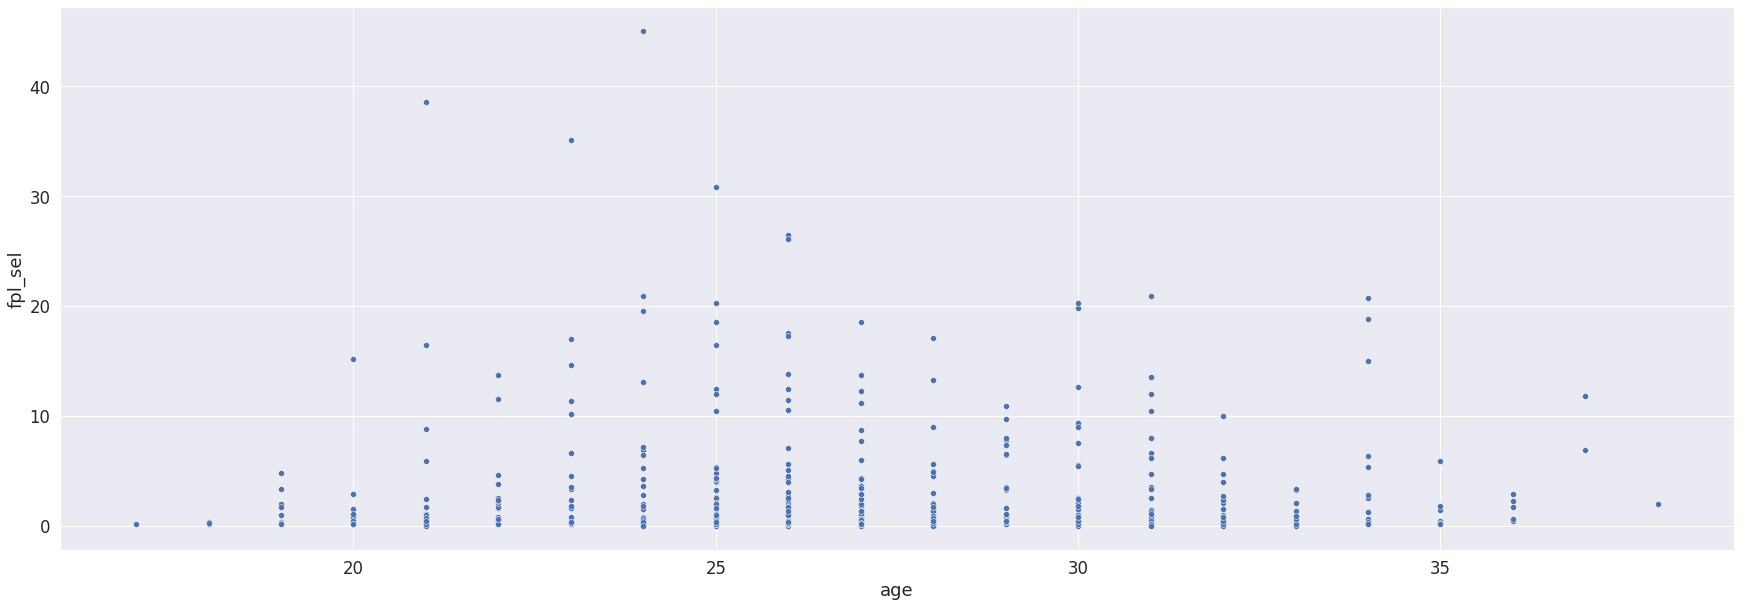

In [78]:
sns.scatterplot(data=df_changed,x='age',y='fpl_sel')

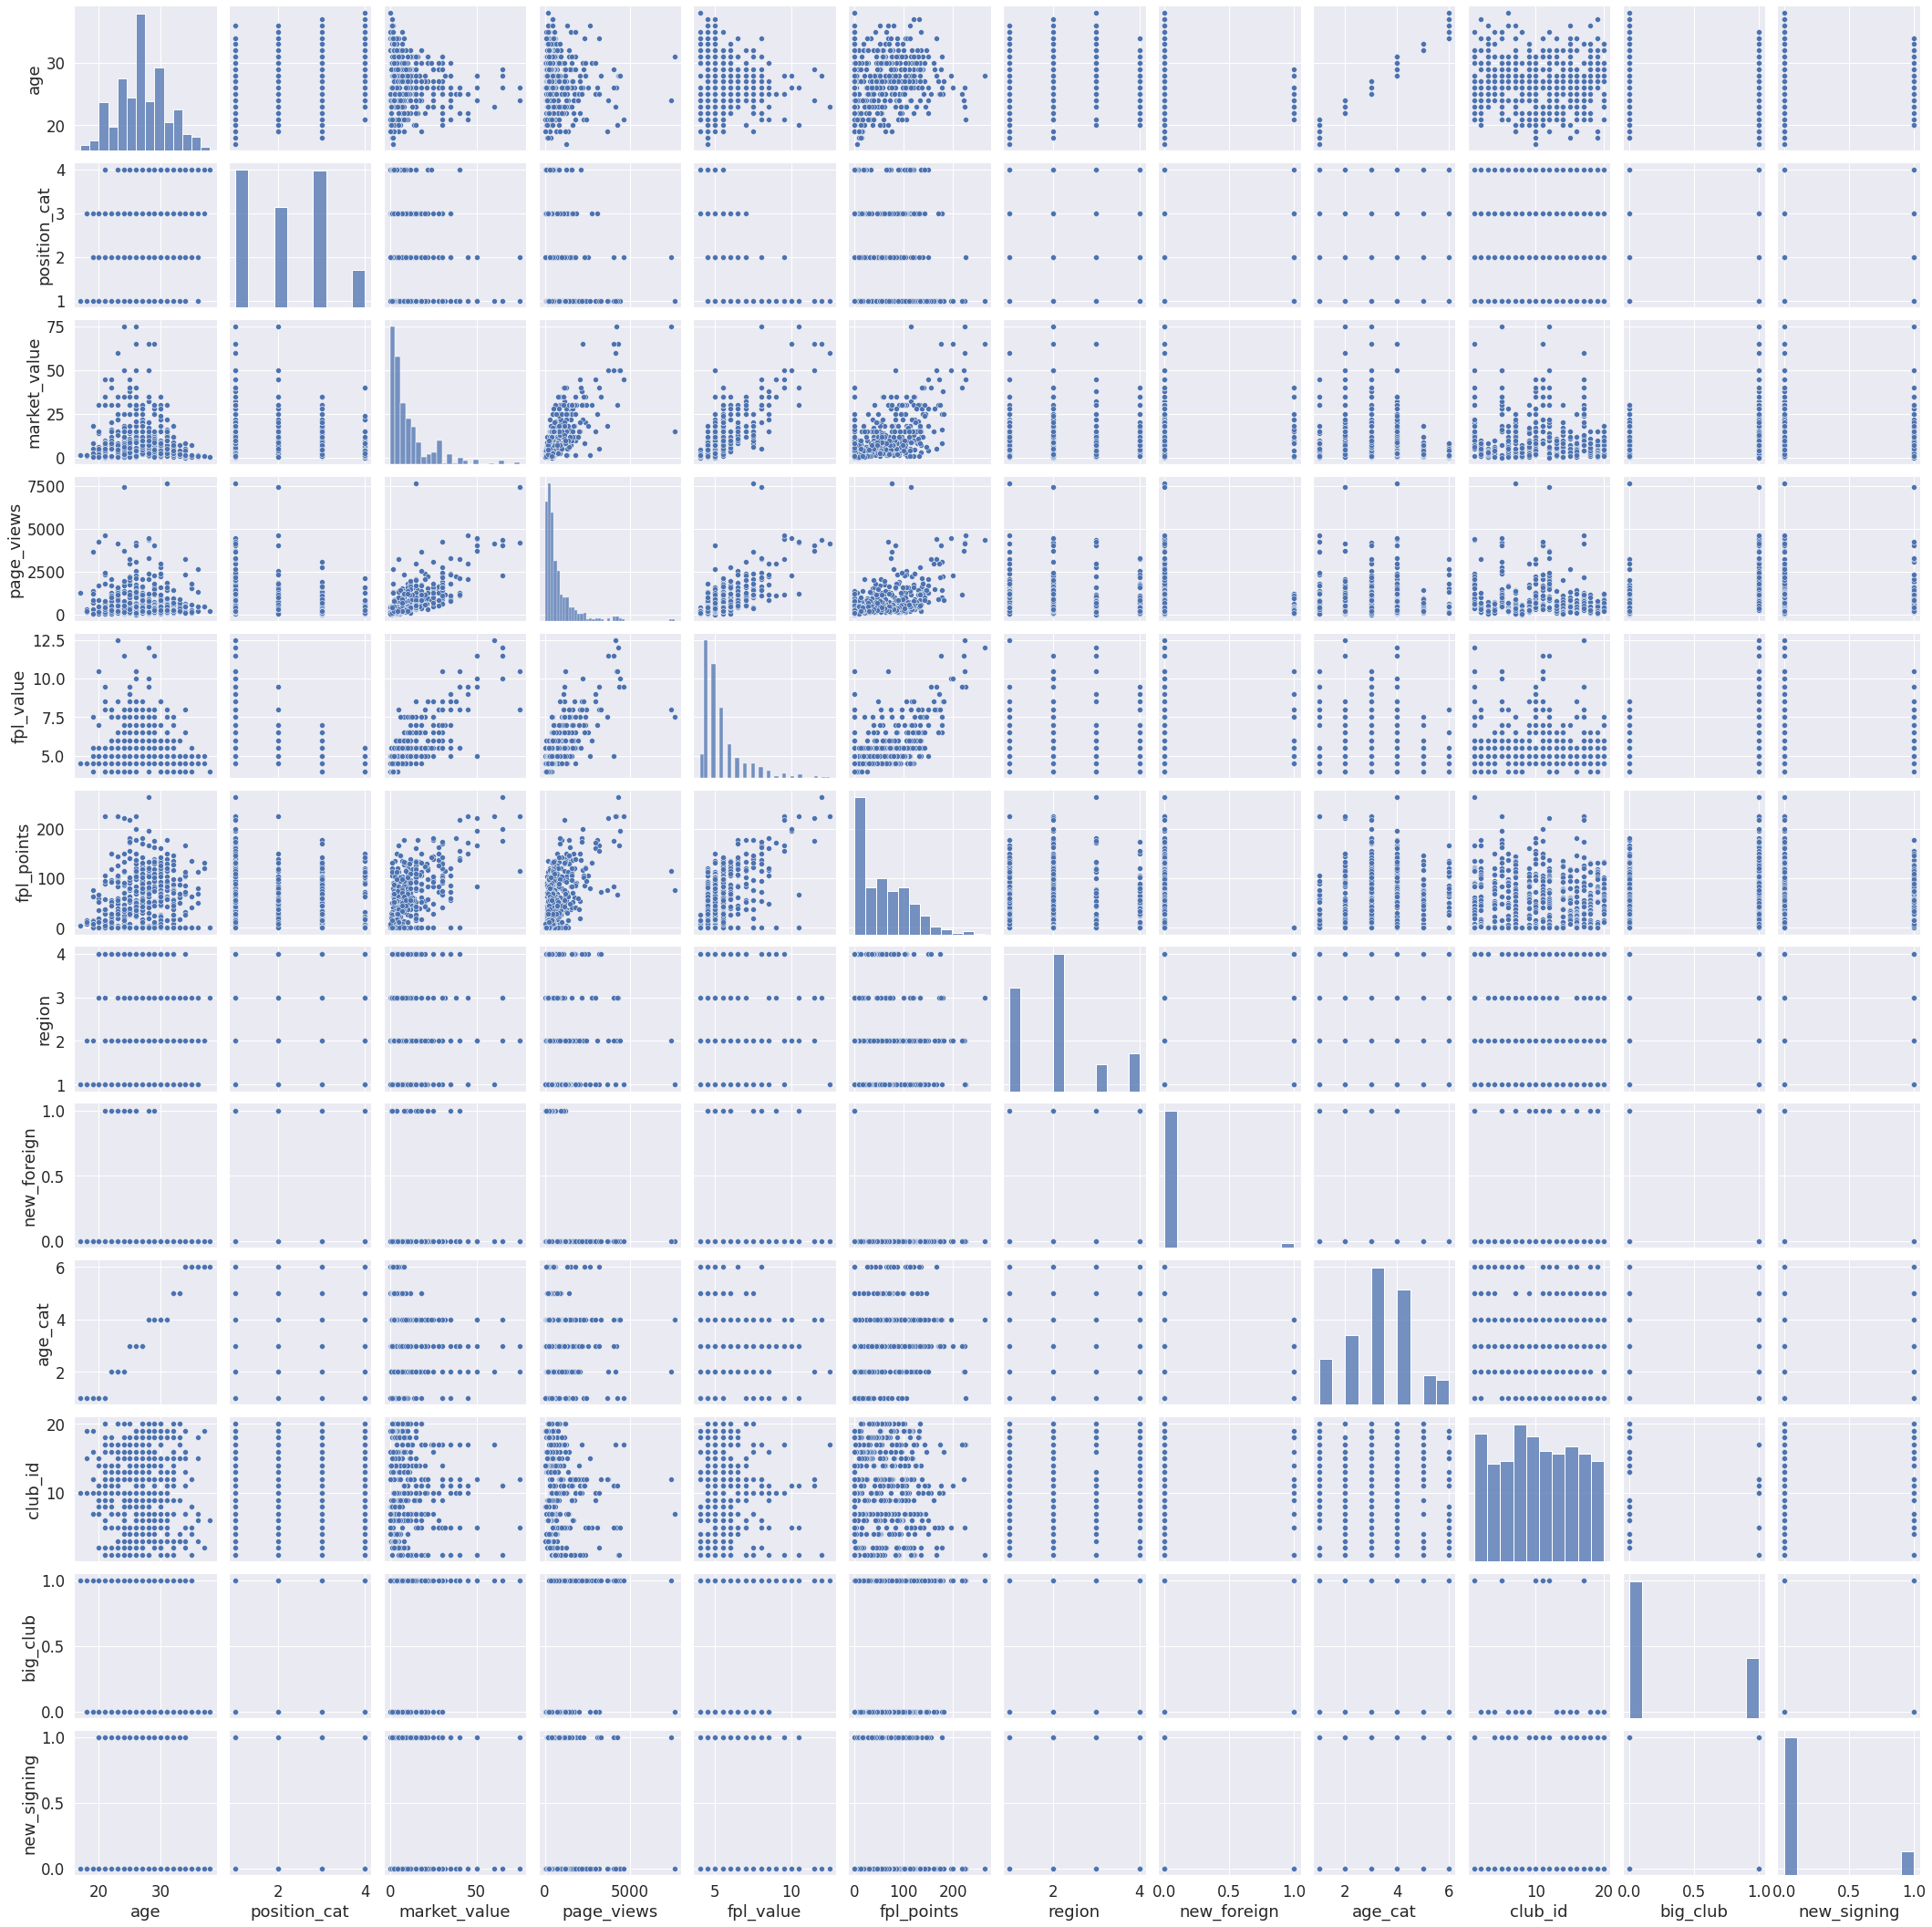

In [79]:
sns.pairplot(df)

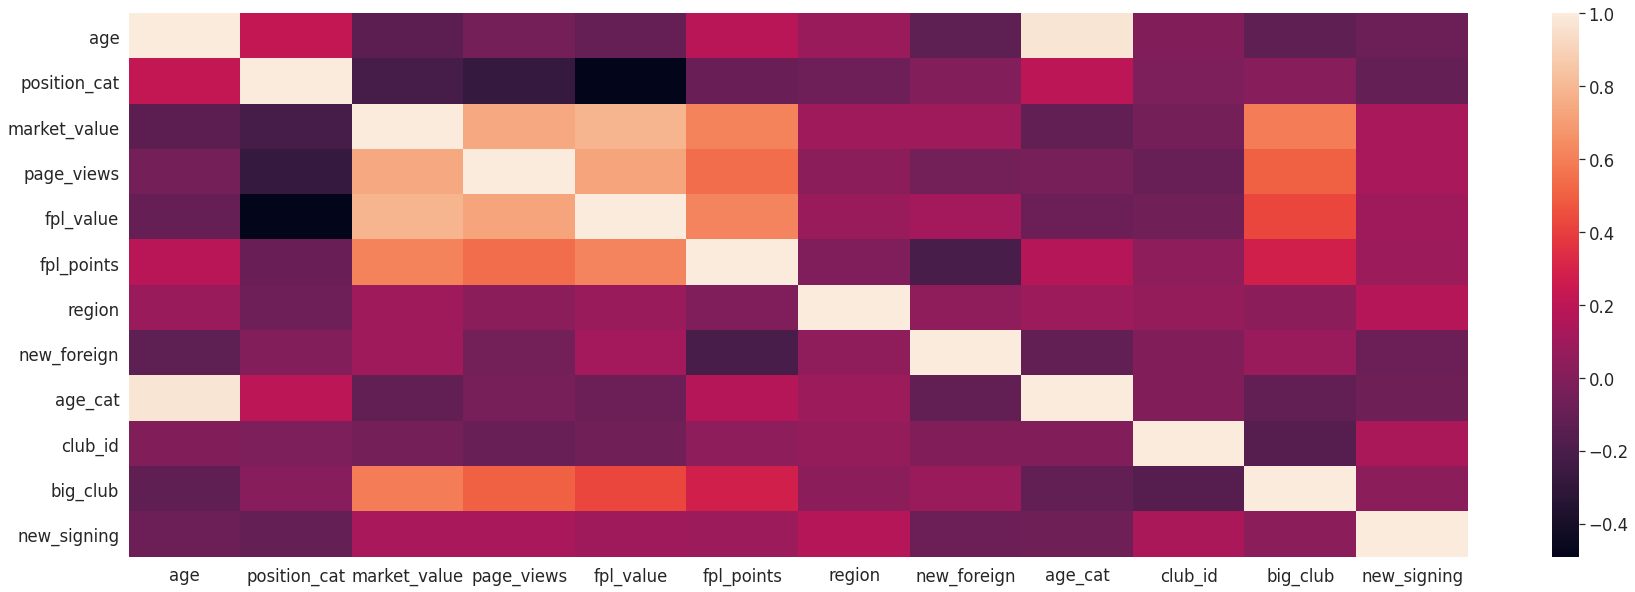

In [80]:
sns.heatmap(df.corr() , xticklabels= df.corr().columns , yticklabels= df.corr().columns)

## player distribution


Text(0.5, 1.0, 'Distribution of Rating')

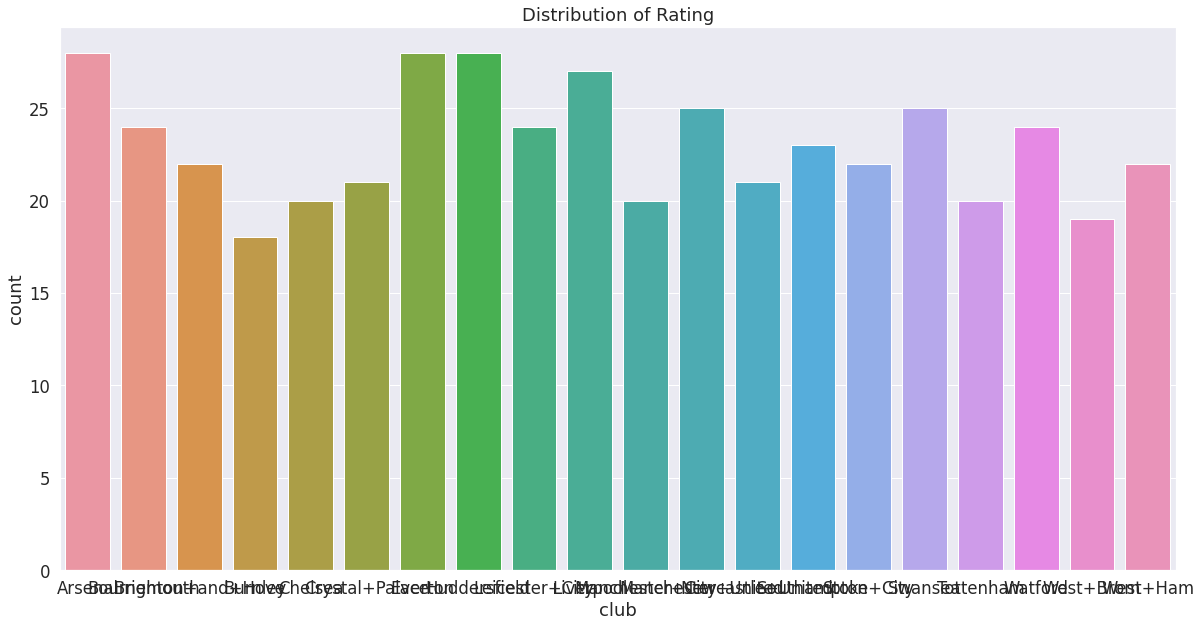

In [84]:

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='club',data=df, ax=ax)
plt.title("Distribution of Rating")